# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [7]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

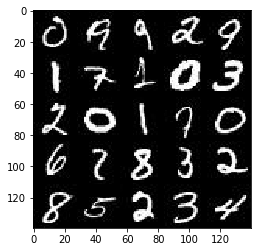

In [8]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

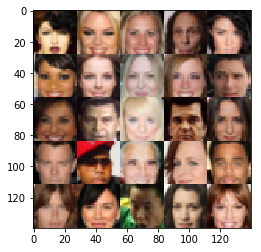

In [9]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [11]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None,image_width,image_height,image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32,(None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return input_real,  input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


In [12]:
def leaky_relu(x, alpha=0.2, name='leaky_relu'):
    return tf.maximum(x, alpha * x, name=name)

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [24]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        # TODO: Implement Function
        l = tf.layers.conv2d(images,32,5,strides=2,kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        l = tf.layers.batch_normalization(l, training=True)
        l = leaky_relu(l)
        l = tf.nn.dropout(l, 0.8)
        #14 *14 *32
    
        l = tf.layers.conv2d(l,64,5,strides=2,kernel_initializer=tf.contrib.layers.xavier_initializer(),padding='same')
        l = tf.layers.batch_normalization(l, training=True)
        l = leaky_relu(l)
        l = tf.nn.dropout(l, 0.8)
        # 7 * 7 *64
        
        l = tf.layers.conv2d(l,128,5,strides=1,kernel_initializer=tf.contrib.layers.xavier_initializer(),padding='same')
        l = tf.layers.batch_normalization(l, training=True)
        l = leaky_relu(l)
        l = tf.nn.dropout(l, 0.8)
    
        # Flatten it
        flat = tf.reshape(l, (-1, 7*7*128))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [25]:
def generator(z, out_channel_dim,is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
   
    # TODO: Implement Function
    with tf.variable_scope("generator",reuse = not is_train):
        l = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        l = tf.reshape(l, (-1, 7, 7,512))
        l = tf.layers.batch_normalization(l, training=is_train)
        l = leaky_relu(l)
        l = tf.nn.dropout(l, 0.5)
        # 4x4x256 now
        
        l = tf.layers.conv2d_transpose(l,256, 5, strides=2, padding='same')
        l = tf.layers.batch_normalization(l, training=is_train)
        l = leaky_relu(l)
        l = tf.nn.dropout(l, 0.5)
        # 7x7x128 now
        
        # 14x14x64 now
        l = tf.layers.conv2d_transpose(l, 128, 5, strides=2, padding='same')
        l = tf.layers.batch_normalization(l, training=is_train)
        l = leaky_relu(l)
        l = tf.nn.dropout(l, 0.5)
        # Output layer
        logits = tf.layers.conv2d_transpose(l, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        out = tf.tanh(logits)
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [26]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_real,d_logits_real = discriminator(input_real)
    d_fake,d_logits_fake = discriminator(g_model,reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_real) * (1 - 0.1)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss,g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [27]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

     # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): 
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return  d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [28]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [29]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, _  = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images * 2
                steps += 1
                # TODO: Train Model
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})
               
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6419... Generator Loss: 2.0775
Epoch 1/2... Discriminator Loss: 0.7504... Generator Loss: 2.1890
Epoch 1/2... Discriminator Loss: 0.9854... Generator Loss: 1.5838
Epoch 1/2... Discriminator Loss: 1.1840... Generator Loss: 1.6751
Epoch 1/2... Discriminator Loss: 0.9569... Generator Loss: 1.1834
Epoch 1/2... Discriminator Loss: 0.8427... Generator Loss: 1.3281
Epoch 1/2... Discriminator Loss: 0.9364... Generator Loss: 2.0090
Epoch 1/2... Discriminator Loss: 0.9220... Generator Loss: 2.4484
Epoch 1/2... Discriminator Loss: 1.0405... Generator Loss: 2.0534
Epoch 1/2... Discriminator Loss: 1.3422... Generator Loss: 0.9409


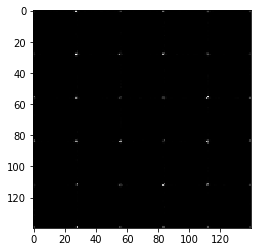

Epoch 1/2... Discriminator Loss: 1.1033... Generator Loss: 1.2640
Epoch 1/2... Discriminator Loss: 1.1345... Generator Loss: 1.4418
Epoch 1/2... Discriminator Loss: 1.6097... Generator Loss: 0.6455
Epoch 1/2... Discriminator Loss: 1.0631... Generator Loss: 1.2934
Epoch 1/2... Discriminator Loss: 1.1202... Generator Loss: 0.7827
Epoch 1/2... Discriminator Loss: 1.0653... Generator Loss: 1.1785
Epoch 1/2... Discriminator Loss: 1.2442... Generator Loss: 1.7417
Epoch 1/2... Discriminator Loss: 1.1373... Generator Loss: 1.0078
Epoch 1/2... Discriminator Loss: 0.8937... Generator Loss: 1.8674
Epoch 1/2... Discriminator Loss: 1.0264... Generator Loss: 1.3185


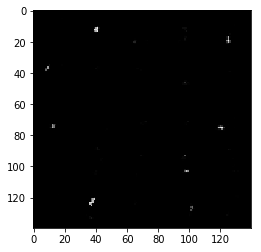

Epoch 1/2... Discriminator Loss: 0.8600... Generator Loss: 1.3727
Epoch 1/2... Discriminator Loss: 1.1796... Generator Loss: 1.8777
Epoch 1/2... Discriminator Loss: 1.1109... Generator Loss: 1.4761
Epoch 1/2... Discriminator Loss: 1.0008... Generator Loss: 1.9202
Epoch 1/2... Discriminator Loss: 0.8585... Generator Loss: 2.2150
Epoch 1/2... Discriminator Loss: 1.1359... Generator Loss: 1.1899
Epoch 1/2... Discriminator Loss: 1.2578... Generator Loss: 0.7876
Epoch 1/2... Discriminator Loss: 0.9810... Generator Loss: 1.9892
Epoch 1/2... Discriminator Loss: 1.0246... Generator Loss: 3.1149
Epoch 1/2... Discriminator Loss: 1.1343... Generator Loss: 1.8517


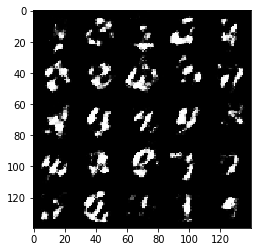

Epoch 1/2... Discriminator Loss: 1.3543... Generator Loss: 3.0716
Epoch 1/2... Discriminator Loss: 0.8114... Generator Loss: 2.0825
Epoch 1/2... Discriminator Loss: 0.8661... Generator Loss: 2.3400
Epoch 1/2... Discriminator Loss: 1.0787... Generator Loss: 1.2756
Epoch 1/2... Discriminator Loss: 1.0691... Generator Loss: 1.1304
Epoch 1/2... Discriminator Loss: 1.6170... Generator Loss: 3.6481
Epoch 1/2... Discriminator Loss: 1.0526... Generator Loss: 1.4182
Epoch 1/2... Discriminator Loss: 1.1303... Generator Loss: 1.2615
Epoch 1/2... Discriminator Loss: 0.9999... Generator Loss: 2.1707
Epoch 1/2... Discriminator Loss: 1.2313... Generator Loss: 2.5221


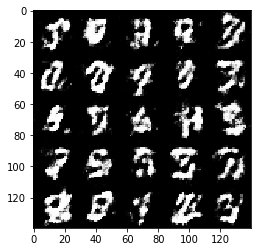

Epoch 1/2... Discriminator Loss: 1.0098... Generator Loss: 1.4403
Epoch 1/2... Discriminator Loss: 1.2671... Generator Loss: 0.6422
Epoch 1/2... Discriminator Loss: 1.3385... Generator Loss: 1.0515
Epoch 1/2... Discriminator Loss: 1.1464... Generator Loss: 1.5931
Epoch 1/2... Discriminator Loss: 1.5873... Generator Loss: 2.8930
Epoch 1/2... Discriminator Loss: 1.1205... Generator Loss: 1.4231
Epoch 1/2... Discriminator Loss: 1.2883... Generator Loss: 2.5314
Epoch 1/2... Discriminator Loss: 0.9633... Generator Loss: 1.5351
Epoch 1/2... Discriminator Loss: 1.4616... Generator Loss: 0.6644
Epoch 1/2... Discriminator Loss: 1.1103... Generator Loss: 1.5094


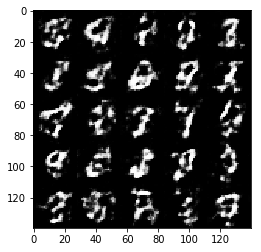

Epoch 1/2... Discriminator Loss: 1.0717... Generator Loss: 1.8361
Epoch 1/2... Discriminator Loss: 0.9803... Generator Loss: 2.5166
Epoch 1/2... Discriminator Loss: 1.2361... Generator Loss: 2.1255
Epoch 1/2... Discriminator Loss: 1.0849... Generator Loss: 1.1639
Epoch 1/2... Discriminator Loss: 0.9407... Generator Loss: 2.1094
Epoch 1/2... Discriminator Loss: 1.0586... Generator Loss: 1.6573
Epoch 1/2... Discriminator Loss: 1.0459... Generator Loss: 1.2723
Epoch 1/2... Discriminator Loss: 1.0520... Generator Loss: 1.5743
Epoch 1/2... Discriminator Loss: 1.0060... Generator Loss: 1.4412
Epoch 1/2... Discriminator Loss: 1.4572... Generator Loss: 0.7113


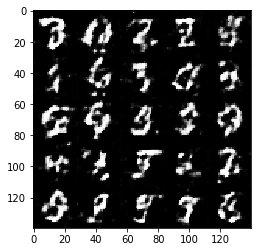

Epoch 1/2... Discriminator Loss: 1.0501... Generator Loss: 1.3642
Epoch 1/2... Discriminator Loss: 0.9987... Generator Loss: 1.3658
Epoch 1/2... Discriminator Loss: 1.1738... Generator Loss: 0.8959
Epoch 1/2... Discriminator Loss: 0.8109... Generator Loss: 1.5595
Epoch 1/2... Discriminator Loss: 1.1050... Generator Loss: 1.7311
Epoch 1/2... Discriminator Loss: 0.9999... Generator Loss: 2.1288
Epoch 1/2... Discriminator Loss: 1.5228... Generator Loss: 2.6046
Epoch 1/2... Discriminator Loss: 0.9135... Generator Loss: 1.3467
Epoch 1/2... Discriminator Loss: 1.1154... Generator Loss: 1.2575
Epoch 1/2... Discriminator Loss: 1.0056... Generator Loss: 2.2349


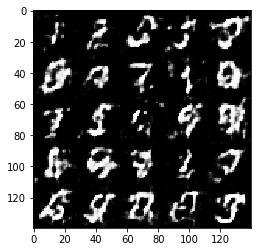

Epoch 1/2... Discriminator Loss: 0.9176... Generator Loss: 1.7607
Epoch 1/2... Discriminator Loss: 0.9987... Generator Loss: 1.3972
Epoch 1/2... Discriminator Loss: 0.9672... Generator Loss: 1.4253
Epoch 1/2... Discriminator Loss: 1.1528... Generator Loss: 2.5614
Epoch 1/2... Discriminator Loss: 0.8379... Generator Loss: 1.7495
Epoch 1/2... Discriminator Loss: 1.0045... Generator Loss: 1.6719
Epoch 1/2... Discriminator Loss: 0.9404... Generator Loss: 1.3060
Epoch 1/2... Discriminator Loss: 0.9699... Generator Loss: 1.1619
Epoch 1/2... Discriminator Loss: 0.9645... Generator Loss: 1.3510
Epoch 1/2... Discriminator Loss: 0.9759... Generator Loss: 1.2770


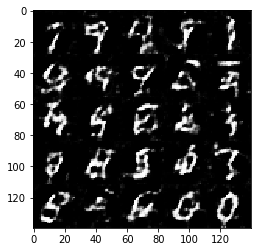

Epoch 1/2... Discriminator Loss: 0.8847... Generator Loss: 1.9205
Epoch 1/2... Discriminator Loss: 0.8811... Generator Loss: 1.9520
Epoch 1/2... Discriminator Loss: 1.0060... Generator Loss: 1.4393
Epoch 1/2... Discriminator Loss: 1.0337... Generator Loss: 1.5263
Epoch 1/2... Discriminator Loss: 1.0724... Generator Loss: 2.4143
Epoch 1/2... Discriminator Loss: 0.9075... Generator Loss: 1.4104
Epoch 1/2... Discriminator Loss: 1.1252... Generator Loss: 1.9534
Epoch 1/2... Discriminator Loss: 1.1098... Generator Loss: 1.1480
Epoch 1/2... Discriminator Loss: 1.2333... Generator Loss: 0.9198
Epoch 1/2... Discriminator Loss: 1.0741... Generator Loss: 1.1707


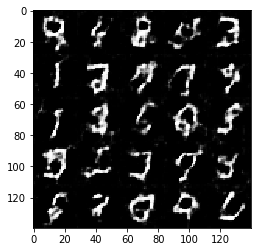

Epoch 1/2... Discriminator Loss: 1.0155... Generator Loss: 1.3102
Epoch 1/2... Discriminator Loss: 1.2174... Generator Loss: 0.7972
Epoch 1/2... Discriminator Loss: 1.2129... Generator Loss: 1.4876
Epoch 1/2... Discriminator Loss: 1.3133... Generator Loss: 0.9740
Epoch 1/2... Discriminator Loss: 1.0147... Generator Loss: 1.4483
Epoch 1/2... Discriminator Loss: 1.1422... Generator Loss: 1.7012
Epoch 1/2... Discriminator Loss: 1.3766... Generator Loss: 0.7579
Epoch 1/2... Discriminator Loss: 1.0225... Generator Loss: 1.1306
Epoch 1/2... Discriminator Loss: 1.1090... Generator Loss: 1.3412
Epoch 1/2... Discriminator Loss: 0.8831... Generator Loss: 1.1050


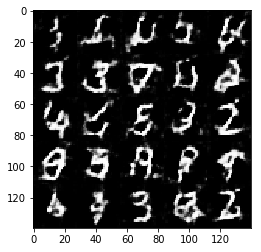

Epoch 1/2... Discriminator Loss: 1.0534... Generator Loss: 1.8415
Epoch 1/2... Discriminator Loss: 1.0578... Generator Loss: 1.1674
Epoch 1/2... Discriminator Loss: 1.0196... Generator Loss: 1.6112
Epoch 1/2... Discriminator Loss: 0.9538... Generator Loss: 1.4980
Epoch 1/2... Discriminator Loss: 1.0221... Generator Loss: 1.2619
Epoch 1/2... Discriminator Loss: 1.0613... Generator Loss: 1.3325
Epoch 1/2... Discriminator Loss: 0.9615... Generator Loss: 1.0830
Epoch 1/2... Discriminator Loss: 1.1210... Generator Loss: 1.7114
Epoch 1/2... Discriminator Loss: 1.0690... Generator Loss: 1.4110
Epoch 1/2... Discriminator Loss: 1.0508... Generator Loss: 2.1854


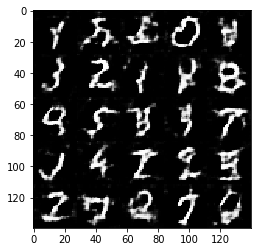

Epoch 1/2... Discriminator Loss: 1.0756... Generator Loss: 1.1742
Epoch 1/2... Discriminator Loss: 1.1059... Generator Loss: 1.6914
Epoch 1/2... Discriminator Loss: 0.9243... Generator Loss: 1.4994
Epoch 1/2... Discriminator Loss: 1.0175... Generator Loss: 1.0377
Epoch 1/2... Discriminator Loss: 0.9604... Generator Loss: 0.8892
Epoch 1/2... Discriminator Loss: 0.9659... Generator Loss: 1.4894
Epoch 1/2... Discriminator Loss: 1.2387... Generator Loss: 1.5302
Epoch 1/2... Discriminator Loss: 1.1268... Generator Loss: 1.3851
Epoch 1/2... Discriminator Loss: 1.0039... Generator Loss: 2.0356
Epoch 1/2... Discriminator Loss: 1.1057... Generator Loss: 0.9387


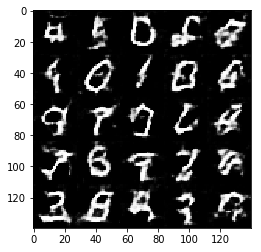

Epoch 1/2... Discriminator Loss: 1.1864... Generator Loss: 1.0272
Epoch 1/2... Discriminator Loss: 1.2090... Generator Loss: 0.8954
Epoch 1/2... Discriminator Loss: 1.1003... Generator Loss: 1.7460
Epoch 1/2... Discriminator Loss: 0.9973... Generator Loss: 1.4665
Epoch 1/2... Discriminator Loss: 1.1771... Generator Loss: 1.0099
Epoch 1/2... Discriminator Loss: 1.1527... Generator Loss: 1.3723
Epoch 1/2... Discriminator Loss: 1.2253... Generator Loss: 1.6451
Epoch 1/2... Discriminator Loss: 0.8759... Generator Loss: 1.2830
Epoch 1/2... Discriminator Loss: 1.1658... Generator Loss: 1.5830
Epoch 1/2... Discriminator Loss: 1.1533... Generator Loss: 1.4169


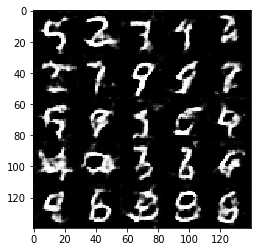

Epoch 1/2... Discriminator Loss: 1.0822... Generator Loss: 1.3317
Epoch 1/2... Discriminator Loss: 0.8247... Generator Loss: 1.1219
Epoch 1/2... Discriminator Loss: 1.1254... Generator Loss: 0.8996
Epoch 1/2... Discriminator Loss: 1.1167... Generator Loss: 1.5502
Epoch 1/2... Discriminator Loss: 1.0059... Generator Loss: 1.6763
Epoch 1/2... Discriminator Loss: 1.1306... Generator Loss: 1.1459
Epoch 1/2... Discriminator Loss: 1.0659... Generator Loss: 1.3511
Epoch 1/2... Discriminator Loss: 1.1087... Generator Loss: 1.2051
Epoch 1/2... Discriminator Loss: 1.0694... Generator Loss: 1.2073
Epoch 1/2... Discriminator Loss: 0.9000... Generator Loss: 1.1652


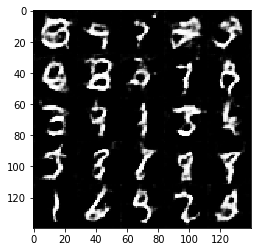

Epoch 1/2... Discriminator Loss: 1.0885... Generator Loss: 0.9476
Epoch 1/2... Discriminator Loss: 1.1741... Generator Loss: 1.9798
Epoch 1/2... Discriminator Loss: 1.0845... Generator Loss: 1.0709
Epoch 1/2... Discriminator Loss: 1.2642... Generator Loss: 0.6335
Epoch 1/2... Discriminator Loss: 1.2996... Generator Loss: 0.8484
Epoch 1/2... Discriminator Loss: 1.2527... Generator Loss: 0.9687
Epoch 1/2... Discriminator Loss: 1.1241... Generator Loss: 1.5268
Epoch 1/2... Discriminator Loss: 1.1770... Generator Loss: 1.3961
Epoch 1/2... Discriminator Loss: 1.0245... Generator Loss: 1.4624
Epoch 1/2... Discriminator Loss: 1.0474... Generator Loss: 1.0506


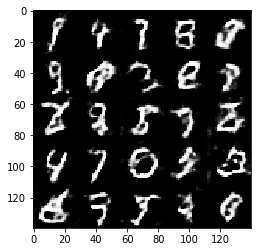

Epoch 1/2... Discriminator Loss: 0.9961... Generator Loss: 1.1584
Epoch 1/2... Discriminator Loss: 0.9792... Generator Loss: 1.0358
Epoch 1/2... Discriminator Loss: 1.1319... Generator Loss: 1.5309
Epoch 1/2... Discriminator Loss: 1.1682... Generator Loss: 1.3025
Epoch 1/2... Discriminator Loss: 1.0479... Generator Loss: 1.0096
Epoch 1/2... Discriminator Loss: 1.0966... Generator Loss: 1.1732
Epoch 1/2... Discriminator Loss: 1.1837... Generator Loss: 1.3731
Epoch 1/2... Discriminator Loss: 1.0523... Generator Loss: 1.7089
Epoch 1/2... Discriminator Loss: 1.2154... Generator Loss: 1.0462
Epoch 1/2... Discriminator Loss: 1.1394... Generator Loss: 1.3799


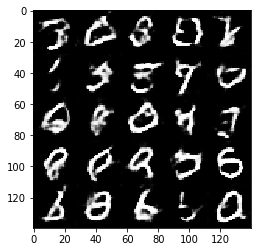

Epoch 1/2... Discriminator Loss: 1.1248... Generator Loss: 1.3440
Epoch 1/2... Discriminator Loss: 0.9801... Generator Loss: 1.4879
Epoch 1/2... Discriminator Loss: 1.0308... Generator Loss: 1.1896
Epoch 1/2... Discriminator Loss: 0.9448... Generator Loss: 1.8012
Epoch 1/2... Discriminator Loss: 1.0566... Generator Loss: 1.0590
Epoch 1/2... Discriminator Loss: 1.1019... Generator Loss: 0.9028
Epoch 1/2... Discriminator Loss: 1.1954... Generator Loss: 1.1390
Epoch 1/2... Discriminator Loss: 1.1115... Generator Loss: 1.3145
Epoch 1/2... Discriminator Loss: 0.8718... Generator Loss: 1.2927
Epoch 1/2... Discriminator Loss: 1.1983... Generator Loss: 0.8551


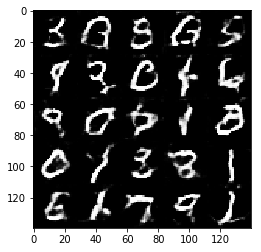

Epoch 1/2... Discriminator Loss: 0.9480... Generator Loss: 1.6949
Epoch 1/2... Discriminator Loss: 1.1431... Generator Loss: 1.3830
Epoch 1/2... Discriminator Loss: 1.0148... Generator Loss: 1.7029
Epoch 1/2... Discriminator Loss: 1.0489... Generator Loss: 1.4889
Epoch 1/2... Discriminator Loss: 0.9949... Generator Loss: 1.3065
Epoch 1/2... Discriminator Loss: 1.1721... Generator Loss: 1.0438
Epoch 1/2... Discriminator Loss: 1.0266... Generator Loss: 1.3819
Epoch 1/2... Discriminator Loss: 1.0546... Generator Loss: 1.5864
Epoch 1/2... Discriminator Loss: 1.0596... Generator Loss: 0.9137
Epoch 1/2... Discriminator Loss: 1.2347... Generator Loss: 0.8963


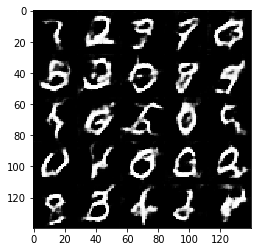

Epoch 1/2... Discriminator Loss: 1.1189... Generator Loss: 1.5557
Epoch 1/2... Discriminator Loss: 1.3362... Generator Loss: 1.3992
Epoch 1/2... Discriminator Loss: 1.1333... Generator Loss: 2.0864
Epoch 1/2... Discriminator Loss: 0.9967... Generator Loss: 1.2589
Epoch 1/2... Discriminator Loss: 0.9662... Generator Loss: 1.5727
Epoch 1/2... Discriminator Loss: 1.1388... Generator Loss: 0.7997
Epoch 1/2... Discriminator Loss: 1.0877... Generator Loss: 1.2862
Epoch 2/2... Discriminator Loss: 1.1190... Generator Loss: 0.8837
Epoch 2/2... Discriminator Loss: 1.0763... Generator Loss: 1.6006
Epoch 2/2... Discriminator Loss: 0.9940... Generator Loss: 1.0360


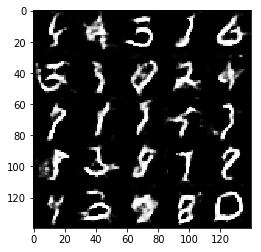

Epoch 2/2... Discriminator Loss: 1.0727... Generator Loss: 1.0547
Epoch 2/2... Discriminator Loss: 1.0171... Generator Loss: 1.4660
Epoch 2/2... Discriminator Loss: 1.2540... Generator Loss: 0.9206
Epoch 2/2... Discriminator Loss: 1.0162... Generator Loss: 1.3709
Epoch 2/2... Discriminator Loss: 1.2208... Generator Loss: 0.7051
Epoch 2/2... Discriminator Loss: 1.0800... Generator Loss: 1.1369
Epoch 2/2... Discriminator Loss: 0.9307... Generator Loss: 1.4008
Epoch 2/2... Discriminator Loss: 1.0568... Generator Loss: 1.6118
Epoch 2/2... Discriminator Loss: 0.9634... Generator Loss: 1.2384
Epoch 2/2... Discriminator Loss: 1.0574... Generator Loss: 1.5761


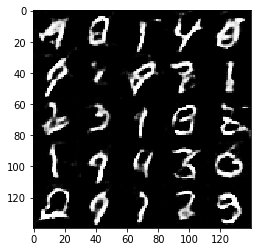

Epoch 2/2... Discriminator Loss: 1.0941... Generator Loss: 1.0398
Epoch 2/2... Discriminator Loss: 0.9892... Generator Loss: 1.3926
Epoch 2/2... Discriminator Loss: 1.0149... Generator Loss: 1.3707
Epoch 2/2... Discriminator Loss: 0.9581... Generator Loss: 1.4976
Epoch 2/2... Discriminator Loss: 0.9688... Generator Loss: 1.3640
Epoch 2/2... Discriminator Loss: 0.9793... Generator Loss: 1.2864
Epoch 2/2... Discriminator Loss: 0.9966... Generator Loss: 1.0446
Epoch 2/2... Discriminator Loss: 1.0456... Generator Loss: 1.4274
Epoch 2/2... Discriminator Loss: 1.0378... Generator Loss: 1.5859
Epoch 2/2... Discriminator Loss: 0.9621... Generator Loss: 1.3082


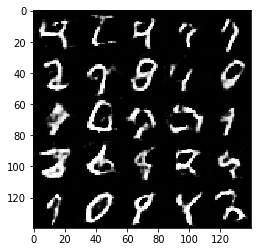

Epoch 2/2... Discriminator Loss: 1.0876... Generator Loss: 1.1410
Epoch 2/2... Discriminator Loss: 1.2140... Generator Loss: 0.9056
Epoch 2/2... Discriminator Loss: 1.2836... Generator Loss: 1.3761
Epoch 2/2... Discriminator Loss: 0.9567... Generator Loss: 1.7870
Epoch 2/2... Discriminator Loss: 1.3032... Generator Loss: 1.2079
Epoch 2/2... Discriminator Loss: 1.2296... Generator Loss: 1.9580
Epoch 2/2... Discriminator Loss: 1.1842... Generator Loss: 1.9007
Epoch 2/2... Discriminator Loss: 1.1254... Generator Loss: 1.0586
Epoch 2/2... Discriminator Loss: 1.1323... Generator Loss: 1.1672
Epoch 2/2... Discriminator Loss: 1.1320... Generator Loss: 0.7699


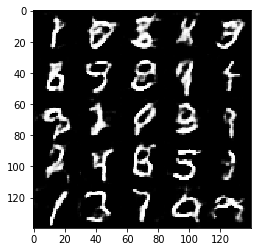

Epoch 2/2... Discriminator Loss: 0.9678... Generator Loss: 1.2872
Epoch 2/2... Discriminator Loss: 0.9060... Generator Loss: 1.8033
Epoch 2/2... Discriminator Loss: 0.8919... Generator Loss: 1.6814
Epoch 2/2... Discriminator Loss: 1.4160... Generator Loss: 2.1912
Epoch 2/2... Discriminator Loss: 1.1384... Generator Loss: 1.5980
Epoch 2/2... Discriminator Loss: 1.1323... Generator Loss: 1.6190
Epoch 2/2... Discriminator Loss: 1.2159... Generator Loss: 1.4119
Epoch 2/2... Discriminator Loss: 1.0849... Generator Loss: 0.9763
Epoch 2/2... Discriminator Loss: 1.0175... Generator Loss: 1.3635
Epoch 2/2... Discriminator Loss: 1.2753... Generator Loss: 2.1802


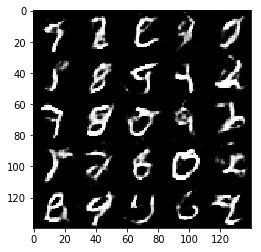

Epoch 2/2... Discriminator Loss: 0.8682... Generator Loss: 1.6172
Epoch 2/2... Discriminator Loss: 0.8537... Generator Loss: 1.4487
Epoch 2/2... Discriminator Loss: 0.9036... Generator Loss: 1.1720
Epoch 2/2... Discriminator Loss: 1.0296... Generator Loss: 1.1614
Epoch 2/2... Discriminator Loss: 1.1588... Generator Loss: 1.2586
Epoch 2/2... Discriminator Loss: 1.0843... Generator Loss: 1.0070
Epoch 2/2... Discriminator Loss: 1.1684... Generator Loss: 1.0670
Epoch 2/2... Discriminator Loss: 1.0750... Generator Loss: 1.1349
Epoch 2/2... Discriminator Loss: 0.7352... Generator Loss: 1.6002
Epoch 2/2... Discriminator Loss: 1.2550... Generator Loss: 1.7085


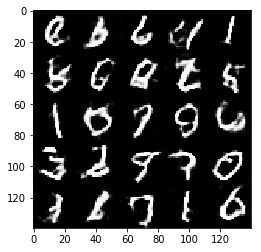

Epoch 2/2... Discriminator Loss: 1.4500... Generator Loss: 0.6727
Epoch 2/2... Discriminator Loss: 0.7706... Generator Loss: 0.8848
Epoch 2/2... Discriminator Loss: 1.2290... Generator Loss: 1.9513
Epoch 2/2... Discriminator Loss: 0.9549... Generator Loss: 1.0407
Epoch 2/2... Discriminator Loss: 1.0628... Generator Loss: 1.1295
Epoch 2/2... Discriminator Loss: 0.9324... Generator Loss: 1.5404
Epoch 2/2... Discriminator Loss: 0.8938... Generator Loss: 1.7729
Epoch 2/2... Discriminator Loss: 1.0164... Generator Loss: 1.1221
Epoch 2/2... Discriminator Loss: 1.1346... Generator Loss: 1.9618
Epoch 2/2... Discriminator Loss: 1.0782... Generator Loss: 1.4352


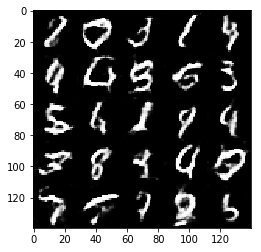

Epoch 2/2... Discriminator Loss: 0.9860... Generator Loss: 1.2004
Epoch 2/2... Discriminator Loss: 0.9773... Generator Loss: 1.8971
Epoch 2/2... Discriminator Loss: 1.0315... Generator Loss: 0.9297
Epoch 2/2... Discriminator Loss: 0.7700... Generator Loss: 1.5896
Epoch 2/2... Discriminator Loss: 1.1035... Generator Loss: 1.2830
Epoch 2/2... Discriminator Loss: 0.9874... Generator Loss: 1.8146
Epoch 2/2... Discriminator Loss: 1.1242... Generator Loss: 1.0925
Epoch 2/2... Discriminator Loss: 1.0511... Generator Loss: 2.2078
Epoch 2/2... Discriminator Loss: 1.0196... Generator Loss: 1.3535
Epoch 2/2... Discriminator Loss: 0.8672... Generator Loss: 0.9961


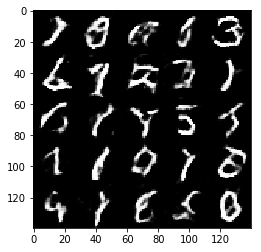

Epoch 2/2... Discriminator Loss: 1.0611... Generator Loss: 0.9110
Epoch 2/2... Discriminator Loss: 0.8102... Generator Loss: 1.7275
Epoch 2/2... Discriminator Loss: 0.9402... Generator Loss: 0.9230
Epoch 2/2... Discriminator Loss: 1.1224... Generator Loss: 1.8802
Epoch 2/2... Discriminator Loss: 0.8766... Generator Loss: 1.5978
Epoch 2/2... Discriminator Loss: 0.8419... Generator Loss: 1.1091
Epoch 2/2... Discriminator Loss: 0.8197... Generator Loss: 1.2318
Epoch 2/2... Discriminator Loss: 1.2227... Generator Loss: 1.4821
Epoch 2/2... Discriminator Loss: 0.8731... Generator Loss: 1.0338
Epoch 2/2... Discriminator Loss: 1.1155... Generator Loss: 1.0402


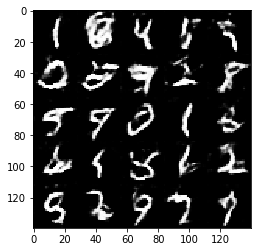

Epoch 2/2... Discriminator Loss: 0.9778... Generator Loss: 1.2212
Epoch 2/2... Discriminator Loss: 0.9786... Generator Loss: 2.2290
Epoch 2/2... Discriminator Loss: 0.8030... Generator Loss: 1.4700
Epoch 2/2... Discriminator Loss: 1.0753... Generator Loss: 1.5585
Epoch 2/2... Discriminator Loss: 0.9190... Generator Loss: 1.1991
Epoch 2/2... Discriminator Loss: 0.9728... Generator Loss: 2.0072
Epoch 2/2... Discriminator Loss: 0.7811... Generator Loss: 1.9090
Epoch 2/2... Discriminator Loss: 1.2118... Generator Loss: 0.8582
Epoch 2/2... Discriminator Loss: 1.0257... Generator Loss: 1.7624
Epoch 2/2... Discriminator Loss: 0.9818... Generator Loss: 1.2216


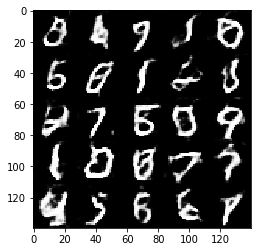

Epoch 2/2... Discriminator Loss: 1.1406... Generator Loss: 1.8493
Epoch 2/2... Discriminator Loss: 1.2156... Generator Loss: 0.8497
Epoch 2/2... Discriminator Loss: 1.1180... Generator Loss: 1.1709
Epoch 2/2... Discriminator Loss: 0.9660... Generator Loss: 1.8606
Epoch 2/2... Discriminator Loss: 0.8968... Generator Loss: 1.3372
Epoch 2/2... Discriminator Loss: 0.8834... Generator Loss: 1.4190
Epoch 2/2... Discriminator Loss: 1.0459... Generator Loss: 1.6335
Epoch 2/2... Discriminator Loss: 1.0453... Generator Loss: 1.1397
Epoch 2/2... Discriminator Loss: 0.9746... Generator Loss: 1.6390
Epoch 2/2... Discriminator Loss: 1.3084... Generator Loss: 0.8275


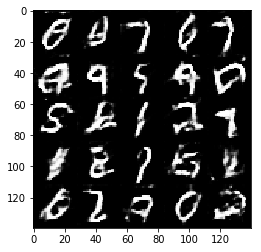

Epoch 2/2... Discriminator Loss: 1.0279... Generator Loss: 1.7670
Epoch 2/2... Discriminator Loss: 0.9362... Generator Loss: 1.5392
Epoch 2/2... Discriminator Loss: 0.8988... Generator Loss: 2.0963
Epoch 2/2... Discriminator Loss: 0.9078... Generator Loss: 1.3512
Epoch 2/2... Discriminator Loss: 0.9447... Generator Loss: 1.4436
Epoch 2/2... Discriminator Loss: 1.3485... Generator Loss: 2.2843
Epoch 2/2... Discriminator Loss: 0.9368... Generator Loss: 1.8722
Epoch 2/2... Discriminator Loss: 1.1085... Generator Loss: 1.1402
Epoch 2/2... Discriminator Loss: 0.8243... Generator Loss: 1.7262
Epoch 2/2... Discriminator Loss: 0.8257... Generator Loss: 1.7553


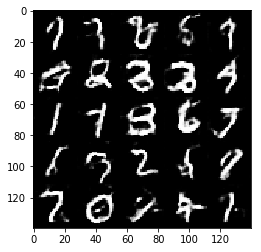

Epoch 2/2... Discriminator Loss: 0.8747... Generator Loss: 1.4384
Epoch 2/2... Discriminator Loss: 0.9870... Generator Loss: 0.8230
Epoch 2/2... Discriminator Loss: 1.0127... Generator Loss: 1.6326
Epoch 2/2... Discriminator Loss: 0.9591... Generator Loss: 1.4972
Epoch 2/2... Discriminator Loss: 1.2042... Generator Loss: 2.2693
Epoch 2/2... Discriminator Loss: 0.8263... Generator Loss: 1.6716
Epoch 2/2... Discriminator Loss: 0.8962... Generator Loss: 1.6527
Epoch 2/2... Discriminator Loss: 0.8808... Generator Loss: 1.2491
Epoch 2/2... Discriminator Loss: 1.3663... Generator Loss: 0.9972
Epoch 2/2... Discriminator Loss: 1.0749... Generator Loss: 1.0588


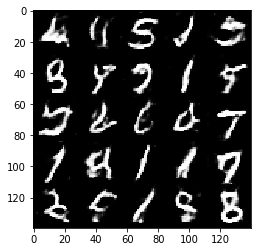

Epoch 2/2... Discriminator Loss: 0.9320... Generator Loss: 2.0570
Epoch 2/2... Discriminator Loss: 0.9426... Generator Loss: 1.3711
Epoch 2/2... Discriminator Loss: 0.8621... Generator Loss: 1.2250
Epoch 2/2... Discriminator Loss: 1.0336... Generator Loss: 1.2893
Epoch 2/2... Discriminator Loss: 0.9707... Generator Loss: 1.2959
Epoch 2/2... Discriminator Loss: 0.8307... Generator Loss: 1.7835
Epoch 2/2... Discriminator Loss: 1.0476... Generator Loss: 1.0343
Epoch 2/2... Discriminator Loss: 0.6497... Generator Loss: 1.5351
Epoch 2/2... Discriminator Loss: 0.8515... Generator Loss: 1.5740
Epoch 2/2... Discriminator Loss: 0.9475... Generator Loss: 2.1124


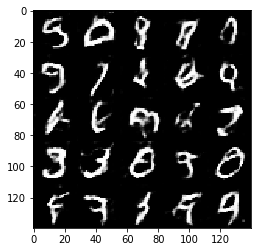

Epoch 2/2... Discriminator Loss: 1.0938... Generator Loss: 0.9405
Epoch 2/2... Discriminator Loss: 0.6688... Generator Loss: 1.5531
Epoch 2/2... Discriminator Loss: 0.9705... Generator Loss: 2.1790
Epoch 2/2... Discriminator Loss: 1.2150... Generator Loss: 2.5709
Epoch 2/2... Discriminator Loss: 0.9832... Generator Loss: 1.0985
Epoch 2/2... Discriminator Loss: 0.9320... Generator Loss: 1.3919
Epoch 2/2... Discriminator Loss: 0.9146... Generator Loss: 1.4353
Epoch 2/2... Discriminator Loss: 0.7514... Generator Loss: 1.9437
Epoch 2/2... Discriminator Loss: 0.8501... Generator Loss: 1.5148
Epoch 2/2... Discriminator Loss: 0.9466... Generator Loss: 0.9104


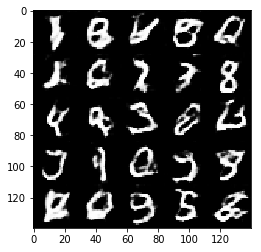

Epoch 2/2... Discriminator Loss: 1.1008... Generator Loss: 1.5114
Epoch 2/2... Discriminator Loss: 1.0352... Generator Loss: 2.1050
Epoch 2/2... Discriminator Loss: 0.7982... Generator Loss: 2.0311
Epoch 2/2... Discriminator Loss: 1.0811... Generator Loss: 2.3022
Epoch 2/2... Discriminator Loss: 0.8430... Generator Loss: 1.6544
Epoch 2/2... Discriminator Loss: 1.0032... Generator Loss: 0.8878
Epoch 2/2... Discriminator Loss: 0.8273... Generator Loss: 1.6482
Epoch 2/2... Discriminator Loss: 0.9558... Generator Loss: 1.0165
Epoch 2/2... Discriminator Loss: 0.7725... Generator Loss: 1.5092
Epoch 2/2... Discriminator Loss: 1.0530... Generator Loss: 2.3257


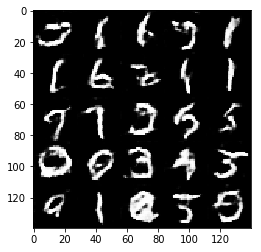

Epoch 2/2... Discriminator Loss: 0.7270... Generator Loss: 2.0045
Epoch 2/2... Discriminator Loss: 0.8697... Generator Loss: 2.1579
Epoch 2/2... Discriminator Loss: 0.9188... Generator Loss: 1.1873
Epoch 2/2... Discriminator Loss: 0.8362... Generator Loss: 0.9427
Epoch 2/2... Discriminator Loss: 0.8918... Generator Loss: 1.5371
Epoch 2/2... Discriminator Loss: 0.8354... Generator Loss: 1.3956
Epoch 2/2... Discriminator Loss: 0.8715... Generator Loss: 1.2201
Epoch 2/2... Discriminator Loss: 1.0804... Generator Loss: 2.2961
Epoch 2/2... Discriminator Loss: 0.9252... Generator Loss: 1.7404
Epoch 2/2... Discriminator Loss: 0.9912... Generator Loss: 2.0660


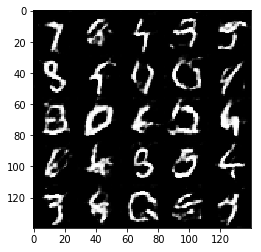

Epoch 2/2... Discriminator Loss: 1.1497... Generator Loss: 0.9304
Epoch 2/2... Discriminator Loss: 0.9414... Generator Loss: 1.5770
Epoch 2/2... Discriminator Loss: 0.9948... Generator Loss: 0.8619
Epoch 2/2... Discriminator Loss: 0.7592... Generator Loss: 1.5211
Epoch 2/2... Discriminator Loss: 0.9473... Generator Loss: 2.0110
Epoch 2/2... Discriminator Loss: 0.8359... Generator Loss: 1.2251
Epoch 2/2... Discriminator Loss: 1.0087... Generator Loss: 1.4568
Epoch 2/2... Discriminator Loss: 0.8355... Generator Loss: 1.2288
Epoch 2/2... Discriminator Loss: 1.0525... Generator Loss: 0.9828
Epoch 2/2... Discriminator Loss: 0.9559... Generator Loss: 1.2632


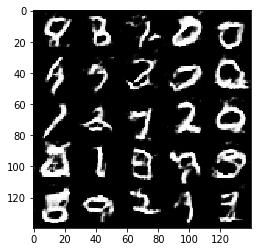

Epoch 2/2... Discriminator Loss: 0.9765... Generator Loss: 1.5492
Epoch 2/2... Discriminator Loss: 0.8975... Generator Loss: 1.6160
Epoch 2/2... Discriminator Loss: 0.9397... Generator Loss: 1.1245
Epoch 2/2... Discriminator Loss: 0.9243... Generator Loss: 2.2280
Epoch 2/2... Discriminator Loss: 0.8301... Generator Loss: 1.6689
Epoch 2/2... Discriminator Loss: 0.9583... Generator Loss: 0.8430
Epoch 2/2... Discriminator Loss: 0.8288... Generator Loss: 2.1848
Epoch 2/2... Discriminator Loss: 1.0083... Generator Loss: 0.7563
Epoch 2/2... Discriminator Loss: 0.7811... Generator Loss: 1.6901
Epoch 2/2... Discriminator Loss: 0.8756... Generator Loss: 1.1713


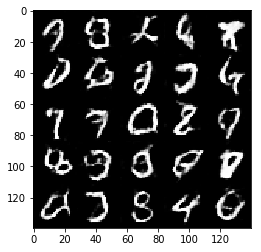

Epoch 2/2... Discriminator Loss: 1.0704... Generator Loss: 1.2014
Epoch 2/2... Discriminator Loss: 0.9217... Generator Loss: 2.2318
Epoch 2/2... Discriminator Loss: 0.7985... Generator Loss: 1.3051
Epoch 2/2... Discriminator Loss: 0.7568... Generator Loss: 1.4063
Epoch 2/2... Discriminator Loss: 0.8669... Generator Loss: 2.6894


In [31]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.6853... Generator Loss: 2.3061
Epoch 1/1... Discriminator Loss: 0.5652... Generator Loss: 2.2367
Epoch 1/1... Discriminator Loss: 0.5322... Generator Loss: 2.6101
Epoch 1/1... Discriminator Loss: 0.5821... Generator Loss: 2.6350
Epoch 1/1... Discriminator Loss: 0.6235... Generator Loss: 3.0437
Epoch 1/1... Discriminator Loss: 0.5711... Generator Loss: 2.3611
Epoch 1/1... Discriminator Loss: 0.5648... Generator Loss: 2.6751
Epoch 1/1... Discriminator Loss: 0.5076... Generator Loss: 2.7080
Epoch 1/1... Discriminator Loss: 0.5111... Generator Loss: 2.7571
Epoch 1/1... Discriminator Loss: 0.4970... Generator Loss: 3.9834


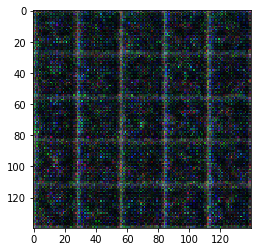

Epoch 1/1... Discriminator Loss: 0.4650... Generator Loss: 3.3829
Epoch 1/1... Discriminator Loss: 0.4501... Generator Loss: 3.7242
Epoch 1/1... Discriminator Loss: 0.4434... Generator Loss: 3.2604
Epoch 1/1... Discriminator Loss: 0.5037... Generator Loss: 2.8169
Epoch 1/1... Discriminator Loss: 0.4369... Generator Loss: 5.1890
Epoch 1/1... Discriminator Loss: 0.5352... Generator Loss: 2.6960
Epoch 1/1... Discriminator Loss: 0.4645... Generator Loss: 4.0506
Epoch 1/1... Discriminator Loss: 0.5721... Generator Loss: 2.5511
Epoch 1/1... Discriminator Loss: 0.5977... Generator Loss: 2.9524
Epoch 1/1... Discriminator Loss: 0.5191... Generator Loss: 2.8356


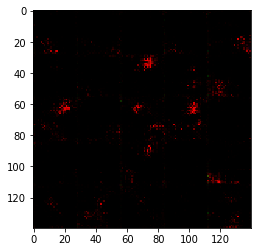

Epoch 1/1... Discriminator Loss: 0.4565... Generator Loss: 3.9312
Epoch 1/1... Discriminator Loss: 0.4026... Generator Loss: 4.3725
Epoch 1/1... Discriminator Loss: 0.3989... Generator Loss: 4.1753
Epoch 1/1... Discriminator Loss: 0.4204... Generator Loss: 3.4694
Epoch 1/1... Discriminator Loss: 0.5031... Generator Loss: 2.6936
Epoch 1/1... Discriminator Loss: 0.4620... Generator Loss: 3.8243
Epoch 1/1... Discriminator Loss: 0.3962... Generator Loss: 5.1220
Epoch 1/1... Discriminator Loss: 0.4546... Generator Loss: 5.5437
Epoch 1/1... Discriminator Loss: 0.4073... Generator Loss: 5.1189
Epoch 1/1... Discriminator Loss: 0.3911... Generator Loss: 4.8213


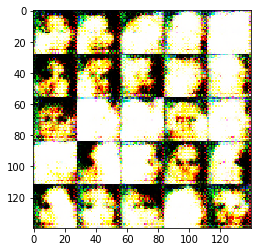

Epoch 1/1... Discriminator Loss: 0.4140... Generator Loss: 4.9801
Epoch 1/1... Discriminator Loss: 0.4001... Generator Loss: 5.6176
Epoch 1/1... Discriminator Loss: 0.4231... Generator Loss: 4.4861
Epoch 1/1... Discriminator Loss: 0.3787... Generator Loss: 5.8987
Epoch 1/1... Discriminator Loss: 0.3736... Generator Loss: 5.4733
Epoch 1/1... Discriminator Loss: 0.3922... Generator Loss: 4.2527
Epoch 1/1... Discriminator Loss: 0.3940... Generator Loss: 4.8636
Epoch 1/1... Discriminator Loss: 0.3781... Generator Loss: 5.0306
Epoch 1/1... Discriminator Loss: 0.3747... Generator Loss: 5.0783
Epoch 1/1... Discriminator Loss: 0.3680... Generator Loss: 5.0339


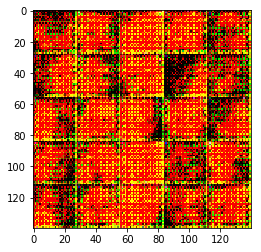

Epoch 1/1... Discriminator Loss: 0.3685... Generator Loss: 5.5308
Epoch 1/1... Discriminator Loss: 0.4591... Generator Loss: 5.0868
Epoch 1/1... Discriminator Loss: 0.3840... Generator Loss: 5.8452
Epoch 1/1... Discriminator Loss: 0.3958... Generator Loss: 5.3332
Epoch 1/1... Discriminator Loss: 0.3562... Generator Loss: 5.6443
Epoch 1/1... Discriminator Loss: 0.3839... Generator Loss: 4.7943
Epoch 1/1... Discriminator Loss: 0.3744... Generator Loss: 4.3866
Epoch 1/1... Discriminator Loss: 0.4111... Generator Loss: 4.2539
Epoch 1/1... Discriminator Loss: 0.4032... Generator Loss: 4.2618
Epoch 1/1... Discriminator Loss: 0.3836... Generator Loss: 5.2318


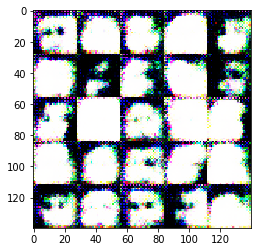

Epoch 1/1... Discriminator Loss: 0.3779... Generator Loss: 5.8137
Epoch 1/1... Discriminator Loss: 1.5829... Generator Loss: 9.5303
Epoch 1/1... Discriminator Loss: 0.4114... Generator Loss: 3.8389
Epoch 1/1... Discriminator Loss: 0.3922... Generator Loss: 4.4272
Epoch 1/1... Discriminator Loss: 0.3884... Generator Loss: 4.1580
Epoch 1/1... Discriminator Loss: 0.3918... Generator Loss: 5.3419
Epoch 1/1... Discriminator Loss: 0.3808... Generator Loss: 4.6797
Epoch 1/1... Discriminator Loss: 0.3740... Generator Loss: 4.4604
Epoch 1/1... Discriminator Loss: 0.3772... Generator Loss: 5.2672
Epoch 1/1... Discriminator Loss: 0.4430... Generator Loss: 3.1876


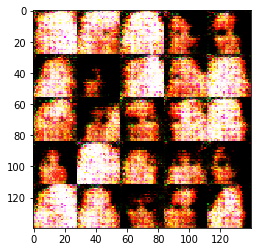

Epoch 1/1... Discriminator Loss: 0.3882... Generator Loss: 4.4743
Epoch 1/1... Discriminator Loss: 0.4951... Generator Loss: 3.4726
Epoch 1/1... Discriminator Loss: 0.7217... Generator Loss: 1.7442
Epoch 1/1... Discriminator Loss: 0.5746... Generator Loss: 2.3683
Epoch 1/1... Discriminator Loss: 0.4230... Generator Loss: 5.1604
Epoch 1/1... Discriminator Loss: 1.1471... Generator Loss: 5.1759
Epoch 1/1... Discriminator Loss: 0.9477... Generator Loss: 1.0023
Epoch 1/1... Discriminator Loss: 0.5763... Generator Loss: 2.1552
Epoch 1/1... Discriminator Loss: 0.6466... Generator Loss: 3.4889
Epoch 1/1... Discriminator Loss: 0.8810... Generator Loss: 1.7618


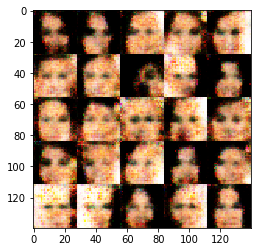

Epoch 1/1... Discriminator Loss: 0.5054... Generator Loss: 2.9612
Epoch 1/1... Discriminator Loss: 0.5804... Generator Loss: 2.7979
Epoch 1/1... Discriminator Loss: 0.8525... Generator Loss: 1.5845
Epoch 1/1... Discriminator Loss: 0.6301... Generator Loss: 2.1668
Epoch 1/1... Discriminator Loss: 0.7080... Generator Loss: 1.7874
Epoch 1/1... Discriminator Loss: 0.8103... Generator Loss: 3.3437
Epoch 1/1... Discriminator Loss: 0.6503... Generator Loss: 2.4018
Epoch 1/1... Discriminator Loss: 0.8191... Generator Loss: 3.5582
Epoch 1/1... Discriminator Loss: 1.0525... Generator Loss: 1.3910
Epoch 1/1... Discriminator Loss: 0.9309... Generator Loss: 1.4517


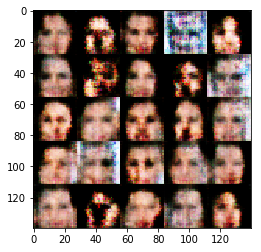

Epoch 1/1... Discriminator Loss: 1.2518... Generator Loss: 0.8742
Epoch 1/1... Discriminator Loss: 1.0057... Generator Loss: 1.1871
Epoch 1/1... Discriminator Loss: 0.8489... Generator Loss: 2.6032
Epoch 1/1... Discriminator Loss: 0.7840... Generator Loss: 3.4325
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 0.8047
Epoch 1/1... Discriminator Loss: 1.0283... Generator Loss: 2.4383
Epoch 1/1... Discriminator Loss: 0.7686... Generator Loss: 2.3023
Epoch 1/1... Discriminator Loss: 0.8126... Generator Loss: 1.5730
Epoch 1/1... Discriminator Loss: 1.2082... Generator Loss: 2.1661
Epoch 1/1... Discriminator Loss: 0.9130... Generator Loss: 1.4723


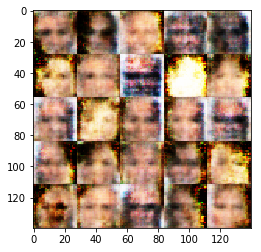

Epoch 1/1... Discriminator Loss: 0.7430... Generator Loss: 1.7813
Epoch 1/1... Discriminator Loss: 0.7531... Generator Loss: 1.7950
Epoch 1/1... Discriminator Loss: 1.0254... Generator Loss: 1.4231
Epoch 1/1... Discriminator Loss: 1.1650... Generator Loss: 1.0881
Epoch 1/1... Discriminator Loss: 0.8701... Generator Loss: 1.5829
Epoch 1/1... Discriminator Loss: 0.9101... Generator Loss: 1.2714
Epoch 1/1... Discriminator Loss: 0.8680... Generator Loss: 3.0936
Epoch 1/1... Discriminator Loss: 1.0688... Generator Loss: 1.1749
Epoch 1/1... Discriminator Loss: 0.8696... Generator Loss: 1.4945
Epoch 1/1... Discriminator Loss: 0.9821... Generator Loss: 1.8152


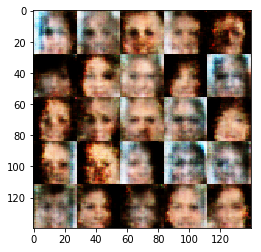

Epoch 1/1... Discriminator Loss: 0.7229... Generator Loss: 1.6907
Epoch 1/1... Discriminator Loss: 1.1600... Generator Loss: 2.9888
Epoch 1/1... Discriminator Loss: 0.8273... Generator Loss: 2.2080
Epoch 1/1... Discriminator Loss: 1.2117... Generator Loss: 2.7923
Epoch 1/1... Discriminator Loss: 0.9377... Generator Loss: 1.0965
Epoch 1/1... Discriminator Loss: 0.9354... Generator Loss: 1.2590
Epoch 1/1... Discriminator Loss: 1.1253... Generator Loss: 1.7538
Epoch 1/1... Discriminator Loss: 1.1471... Generator Loss: 1.2291
Epoch 1/1... Discriminator Loss: 1.3802... Generator Loss: 2.4840
Epoch 1/1... Discriminator Loss: 0.9400... Generator Loss: 1.6222


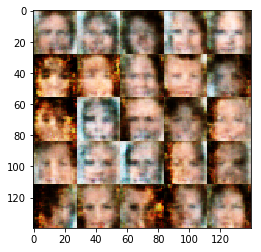

Epoch 1/1... Discriminator Loss: 0.9056... Generator Loss: 1.2667
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 1.8125
Epoch 1/1... Discriminator Loss: 0.9940... Generator Loss: 1.3741
Epoch 1/1... Discriminator Loss: 1.2684... Generator Loss: 1.1402
Epoch 1/1... Discriminator Loss: 1.1936... Generator Loss: 1.4304
Epoch 1/1... Discriminator Loss: 1.6730... Generator Loss: 2.6974
Epoch 1/1... Discriminator Loss: 1.0727... Generator Loss: 1.2412
Epoch 1/1... Discriminator Loss: 1.1267... Generator Loss: 1.6954
Epoch 1/1... Discriminator Loss: 1.1599... Generator Loss: 1.8094
Epoch 1/1... Discriminator Loss: 1.0770... Generator Loss: 0.9084


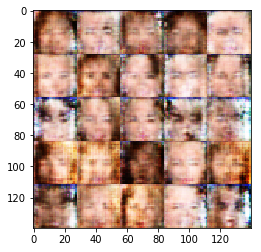

Epoch 1/1... Discriminator Loss: 1.3740... Generator Loss: 3.0032
Epoch 1/1... Discriminator Loss: 1.2386... Generator Loss: 0.9616
Epoch 1/1... Discriminator Loss: 0.9544... Generator Loss: 1.6680
Epoch 1/1... Discriminator Loss: 1.0259... Generator Loss: 1.5822
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 1.0260
Epoch 1/1... Discriminator Loss: 1.0341... Generator Loss: 1.4202
Epoch 1/1... Discriminator Loss: 1.5304... Generator Loss: 1.9706
Epoch 1/1... Discriminator Loss: 0.9309... Generator Loss: 2.2064
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 1.6370
Epoch 1/1... Discriminator Loss: 1.1189... Generator Loss: 1.0363


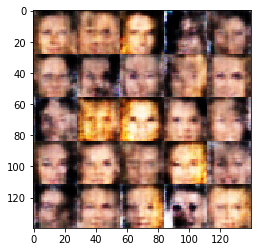

Epoch 1/1... Discriminator Loss: 0.8988... Generator Loss: 1.6319
Epoch 1/1... Discriminator Loss: 1.0309... Generator Loss: 1.2878
Epoch 1/1... Discriminator Loss: 1.0949... Generator Loss: 1.1551
Epoch 1/1... Discriminator Loss: 1.1079... Generator Loss: 1.2635
Epoch 1/1... Discriminator Loss: 0.9033... Generator Loss: 1.5342
Epoch 1/1... Discriminator Loss: 1.1679... Generator Loss: 1.2665
Epoch 1/1... Discriminator Loss: 1.0104... Generator Loss: 1.0919
Epoch 1/1... Discriminator Loss: 0.8217... Generator Loss: 1.4487
Epoch 1/1... Discriminator Loss: 1.1618... Generator Loss: 0.9519
Epoch 1/1... Discriminator Loss: 0.8753... Generator Loss: 1.2572


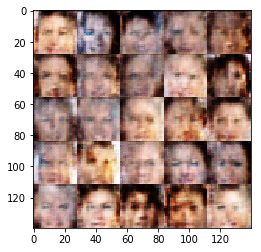

Epoch 1/1... Discriminator Loss: 1.1191... Generator Loss: 1.9080
Epoch 1/1... Discriminator Loss: 1.0032... Generator Loss: 1.3081
Epoch 1/1... Discriminator Loss: 0.9331... Generator Loss: 1.1956
Epoch 1/1... Discriminator Loss: 1.0056... Generator Loss: 1.5261
Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 1.1513... Generator Loss: 1.4091
Epoch 1/1... Discriminator Loss: 1.1976... Generator Loss: 1.6256
Epoch 1/1... Discriminator Loss: 1.0732... Generator Loss: 1.1503
Epoch 1/1... Discriminator Loss: 1.1529... Generator Loss: 0.9062
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 1.1204


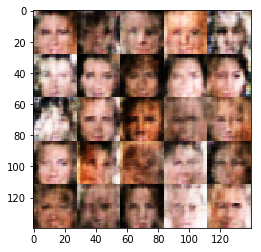

Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.8237
Epoch 1/1... Discriminator Loss: 1.0750... Generator Loss: 1.1313
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 0.8660
Epoch 1/1... Discriminator Loss: 1.2642... Generator Loss: 1.6082
Epoch 1/1... Discriminator Loss: 1.0968... Generator Loss: 0.8884
Epoch 1/1... Discriminator Loss: 1.0787... Generator Loss: 1.2304
Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 1.4482
Epoch 1/1... Discriminator Loss: 1.1650... Generator Loss: 0.9320
Epoch 1/1... Discriminator Loss: 1.0289... Generator Loss: 1.6136
Epoch 1/1... Discriminator Loss: 1.3042... Generator Loss: 1.2178


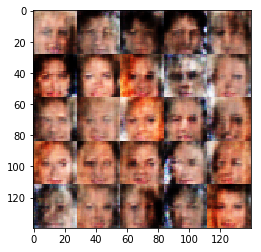

Epoch 1/1... Discriminator Loss: 1.3447... Generator Loss: 0.9141
Epoch 1/1... Discriminator Loss: 1.2091... Generator Loss: 1.0843
Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 1.2126
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 1.0305
Epoch 1/1... Discriminator Loss: 1.2034... Generator Loss: 0.9541
Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 0.9896
Epoch 1/1... Discriminator Loss: 1.2588... Generator Loss: 1.3117
Epoch 1/1... Discriminator Loss: 1.3079... Generator Loss: 0.8165
Epoch 1/1... Discriminator Loss: 1.1854... Generator Loss: 1.5123
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 0.9979


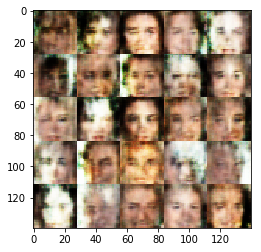

Epoch 1/1... Discriminator Loss: 1.1597... Generator Loss: 1.2077
Epoch 1/1... Discriminator Loss: 1.5027... Generator Loss: 0.8088
Epoch 1/1... Discriminator Loss: 1.1367... Generator Loss: 1.3050
Epoch 1/1... Discriminator Loss: 1.2523... Generator Loss: 1.1710
Epoch 1/1... Discriminator Loss: 1.2092... Generator Loss: 1.6095
Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 1.2990
Epoch 1/1... Discriminator Loss: 1.1331... Generator Loss: 1.2491
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 1.1865
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 1.4502
Epoch 1/1... Discriminator Loss: 1.1568... Generator Loss: 1.2475


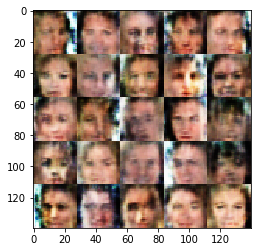

Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 0.8716
Epoch 1/1... Discriminator Loss: 1.2813... Generator Loss: 0.9168
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.9058
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.9999
Epoch 1/1... Discriminator Loss: 1.2492... Generator Loss: 1.4829
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.8319
Epoch 1/1... Discriminator Loss: 1.1332... Generator Loss: 0.9606
Epoch 1/1... Discriminator Loss: 1.1620... Generator Loss: 0.9211
Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 0.9734
Epoch 1/1... Discriminator Loss: 1.2874... Generator Loss: 1.5871


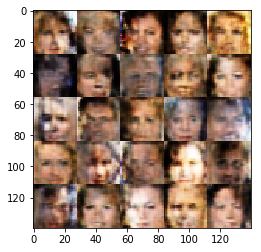

Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.7860
Epoch 1/1... Discriminator Loss: 1.1538... Generator Loss: 1.4478
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 0.9149
Epoch 1/1... Discriminator Loss: 1.2054... Generator Loss: 1.0661
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.9780
Epoch 1/1... Discriminator Loss: 1.1322... Generator Loss: 1.1565
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.9055
Epoch 1/1... Discriminator Loss: 1.2527... Generator Loss: 1.2534
Epoch 1/1... Discriminator Loss: 1.0930... Generator Loss: 1.0429
Epoch 1/1... Discriminator Loss: 1.1811... Generator Loss: 0.7713


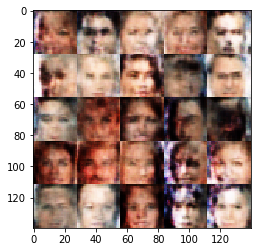

Epoch 1/1... Discriminator Loss: 1.1121... Generator Loss: 1.3182
Epoch 1/1... Discriminator Loss: 1.2388... Generator Loss: 1.0027
Epoch 1/1... Discriminator Loss: 1.1704... Generator Loss: 1.1695
Epoch 1/1... Discriminator Loss: 1.2633... Generator Loss: 0.9009
Epoch 1/1... Discriminator Loss: 1.1498... Generator Loss: 1.0471
Epoch 1/1... Discriminator Loss: 1.1210... Generator Loss: 1.0374
Epoch 1/1... Discriminator Loss: 1.1243... Generator Loss: 0.9754
Epoch 1/1... Discriminator Loss: 1.2961... Generator Loss: 1.1797
Epoch 1/1... Discriminator Loss: 1.2634... Generator Loss: 1.2071
Epoch 1/1... Discriminator Loss: 1.0901... Generator Loss: 1.2020


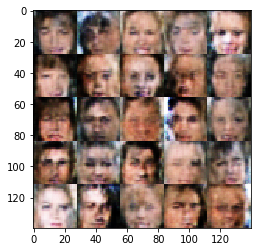

Epoch 1/1... Discriminator Loss: 1.0982... Generator Loss: 1.1507
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 1.3452
Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 1.1263
Epoch 1/1... Discriminator Loss: 1.1191... Generator Loss: 1.0578
Epoch 1/1... Discriminator Loss: 1.1181... Generator Loss: 0.9574
Epoch 1/1... Discriminator Loss: 1.2620... Generator Loss: 0.9045
Epoch 1/1... Discriminator Loss: 1.2702... Generator Loss: 0.7798
Epoch 1/1... Discriminator Loss: 1.1050... Generator Loss: 1.0154
Epoch 1/1... Discriminator Loss: 1.2876... Generator Loss: 1.1395
Epoch 1/1... Discriminator Loss: 1.0275... Generator Loss: 1.2844


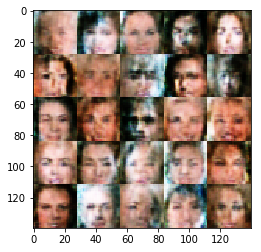

Epoch 1/1... Discriminator Loss: 1.1765... Generator Loss: 0.8271
Epoch 1/1... Discriminator Loss: 1.2975... Generator Loss: 1.1075
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 1.1082
Epoch 1/1... Discriminator Loss: 1.1836... Generator Loss: 0.9413
Epoch 1/1... Discriminator Loss: 1.2388... Generator Loss: 0.9934
Epoch 1/1... Discriminator Loss: 1.0998... Generator Loss: 1.0185
Epoch 1/1... Discriminator Loss: 1.0995... Generator Loss: 0.9965
Epoch 1/1... Discriminator Loss: 1.1936... Generator Loss: 1.1316
Epoch 1/1... Discriminator Loss: 1.2221... Generator Loss: 0.8236
Epoch 1/1... Discriminator Loss: 1.1339... Generator Loss: 1.4137


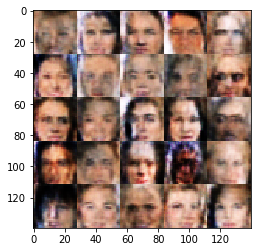

Epoch 1/1... Discriminator Loss: 1.2218... Generator Loss: 0.8837
Epoch 1/1... Discriminator Loss: 1.2566... Generator Loss: 1.2862
Epoch 1/1... Discriminator Loss: 1.2013... Generator Loss: 1.0155
Epoch 1/1... Discriminator Loss: 1.2706... Generator Loss: 1.0744
Epoch 1/1... Discriminator Loss: 1.1685... Generator Loss: 1.1637
Epoch 1/1... Discriminator Loss: 1.0922... Generator Loss: 1.2101
Epoch 1/1... Discriminator Loss: 1.5675... Generator Loss: 1.0057
Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 0.7794
Epoch 1/1... Discriminator Loss: 1.2753... Generator Loss: 0.8353
Epoch 1/1... Discriminator Loss: 1.1824... Generator Loss: 1.2523


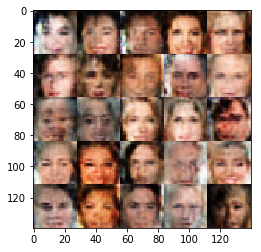

Epoch 1/1... Discriminator Loss: 1.1654... Generator Loss: 1.1958
Epoch 1/1... Discriminator Loss: 1.1980... Generator Loss: 1.1498
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 0.9021
Epoch 1/1... Discriminator Loss: 1.2361... Generator Loss: 1.6370
Epoch 1/1... Discriminator Loss: 1.1943... Generator Loss: 1.0831
Epoch 1/1... Discriminator Loss: 1.2739... Generator Loss: 1.6437
Epoch 1/1... Discriminator Loss: 1.0833... Generator Loss: 0.9585
Epoch 1/1... Discriminator Loss: 1.1585... Generator Loss: 0.9059
Epoch 1/1... Discriminator Loss: 1.0879... Generator Loss: 0.8088
Epoch 1/1... Discriminator Loss: 1.1057... Generator Loss: 1.3555


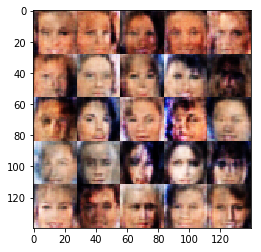

Epoch 1/1... Discriminator Loss: 1.1339... Generator Loss: 1.0553
Epoch 1/1... Discriminator Loss: 1.2413... Generator Loss: 0.9450
Epoch 1/1... Discriminator Loss: 1.2355... Generator Loss: 1.2667
Epoch 1/1... Discriminator Loss: 1.4325... Generator Loss: 0.7752
Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 1.0251
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.8388
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 1.4395
Epoch 1/1... Discriminator Loss: 1.1878... Generator Loss: 0.9852
Epoch 1/1... Discriminator Loss: 1.0805... Generator Loss: 1.3005
Epoch 1/1... Discriminator Loss: 1.2902... Generator Loss: 0.9392


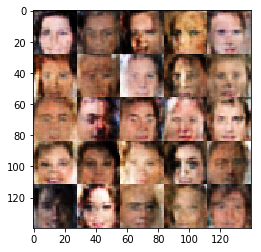

Epoch 1/1... Discriminator Loss: 1.1804... Generator Loss: 1.0412
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 1.2498
Epoch 1/1... Discriminator Loss: 1.0511... Generator Loss: 1.2946
Epoch 1/1... Discriminator Loss: 1.2122... Generator Loss: 0.9193
Epoch 1/1... Discriminator Loss: 1.2681... Generator Loss: 0.8500
Epoch 1/1... Discriminator Loss: 1.2097... Generator Loss: 1.2728
Epoch 1/1... Discriminator Loss: 1.0458... Generator Loss: 1.1757
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 1.0013
Epoch 1/1... Discriminator Loss: 1.2700... Generator Loss: 1.3644
Epoch 1/1... Discriminator Loss: 1.2558... Generator Loss: 0.9183


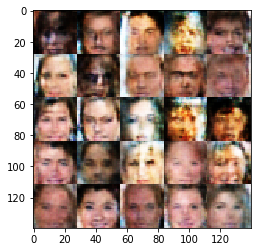

Epoch 1/1... Discriminator Loss: 1.3477... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 1.1598... Generator Loss: 1.2100
Epoch 1/1... Discriminator Loss: 1.2082... Generator Loss: 0.9879
Epoch 1/1... Discriminator Loss: 1.2166... Generator Loss: 0.8165
Epoch 1/1... Discriminator Loss: 1.4862... Generator Loss: 0.7280
Epoch 1/1... Discriminator Loss: 1.5183... Generator Loss: 0.8056
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 1.0359
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.7065
Epoch 1/1... Discriminator Loss: 1.1588... Generator Loss: 0.8652
Epoch 1/1... Discriminator Loss: 1.1086... Generator Loss: 1.3293


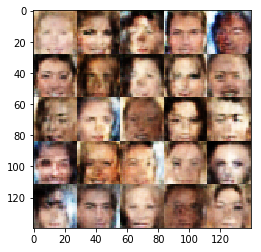

Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 1.2015
Epoch 1/1... Discriminator Loss: 1.0616... Generator Loss: 0.9085
Epoch 1/1... Discriminator Loss: 1.2689... Generator Loss: 0.9858
Epoch 1/1... Discriminator Loss: 1.2328... Generator Loss: 0.9471
Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 1.0264
Epoch 1/1... Discriminator Loss: 1.2362... Generator Loss: 0.8239
Epoch 1/1... Discriminator Loss: 1.2916... Generator Loss: 1.0955
Epoch 1/1... Discriminator Loss: 1.1874... Generator Loss: 0.8109
Epoch 1/1... Discriminator Loss: 1.1337... Generator Loss: 1.2203
Epoch 1/1... Discriminator Loss: 1.2701... Generator Loss: 1.0875


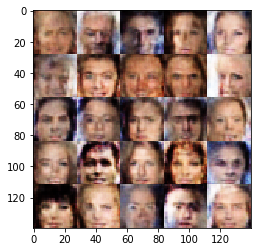

Epoch 1/1... Discriminator Loss: 1.2980... Generator Loss: 1.0594
Epoch 1/1... Discriminator Loss: 1.2502... Generator Loss: 0.8483
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 0.9893
Epoch 1/1... Discriminator Loss: 1.1506... Generator Loss: 1.1582
Epoch 1/1... Discriminator Loss: 1.2401... Generator Loss: 1.0357
Epoch 1/1... Discriminator Loss: 1.2606... Generator Loss: 0.7573
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.8989
Epoch 1/1... Discriminator Loss: 1.1014... Generator Loss: 1.1117
Epoch 1/1... Discriminator Loss: 1.2869... Generator Loss: 0.8131
Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 1.0444


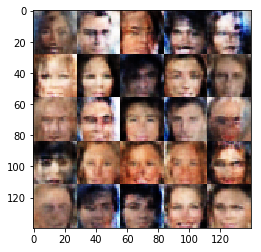

Epoch 1/1... Discriminator Loss: 1.1643... Generator Loss: 1.2213
Epoch 1/1... Discriminator Loss: 1.0839... Generator Loss: 0.9093
Epoch 1/1... Discriminator Loss: 1.3180... Generator Loss: 0.9776
Epoch 1/1... Discriminator Loss: 1.1750... Generator Loss: 1.0022
Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 1.3254
Epoch 1/1... Discriminator Loss: 1.2114... Generator Loss: 0.8576
Epoch 1/1... Discriminator Loss: 1.2091... Generator Loss: 0.9479
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 1.0606
Epoch 1/1... Discriminator Loss: 1.2981... Generator Loss: 0.9429
Epoch 1/1... Discriminator Loss: 1.2329... Generator Loss: 1.1006


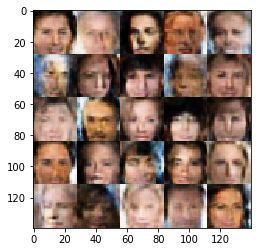

Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.9069
Epoch 1/1... Discriminator Loss: 1.2320... Generator Loss: 1.4268
Epoch 1/1... Discriminator Loss: 1.2090... Generator Loss: 1.4094
Epoch 1/1... Discriminator Loss: 1.2568... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 1.0390... Generator Loss: 1.0542
Epoch 1/1... Discriminator Loss: 1.2623... Generator Loss: 0.9258
Epoch 1/1... Discriminator Loss: 1.2267... Generator Loss: 1.0841
Epoch 1/1... Discriminator Loss: 1.4587... Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 1.2151... Generator Loss: 0.9940
Epoch 1/1... Discriminator Loss: 1.0616... Generator Loss: 1.0448


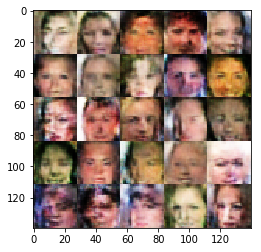

Epoch 1/1... Discriminator Loss: 1.1392... Generator Loss: 1.2338
Epoch 1/1... Discriminator Loss: 1.1815... Generator Loss: 0.8889
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.8495
Epoch 1/1... Discriminator Loss: 1.3386... Generator Loss: 0.7785
Epoch 1/1... Discriminator Loss: 1.3375... Generator Loss: 0.8368
Epoch 1/1... Discriminator Loss: 1.3220... Generator Loss: 0.7657
Epoch 1/1... Discriminator Loss: 1.2166... Generator Loss: 1.1452
Epoch 1/1... Discriminator Loss: 1.2515... Generator Loss: 0.7825
Epoch 1/1... Discriminator Loss: 1.2517... Generator Loss: 0.8550
Epoch 1/1... Discriminator Loss: 1.0522... Generator Loss: 1.0562


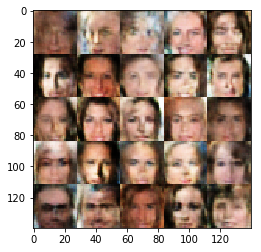

Epoch 1/1... Discriminator Loss: 1.3735... Generator Loss: 1.0222
Epoch 1/1... Discriminator Loss: 1.0570... Generator Loss: 1.0233
Epoch 1/1... Discriminator Loss: 1.2651... Generator Loss: 1.0847
Epoch 1/1... Discriminator Loss: 1.0556... Generator Loss: 1.0240
Epoch 1/1... Discriminator Loss: 1.1869... Generator Loss: 0.9825
Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 1.0393
Epoch 1/1... Discriminator Loss: 1.2012... Generator Loss: 1.3207
Epoch 1/1... Discriminator Loss: 1.1948... Generator Loss: 1.0553
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 1.1443
Epoch 1/1... Discriminator Loss: 1.2423... Generator Loss: 1.0739


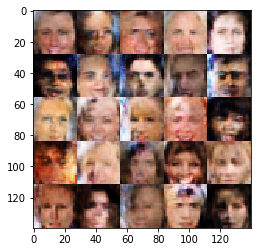

Epoch 1/1... Discriminator Loss: 1.1031... Generator Loss: 1.0574
Epoch 1/1... Discriminator Loss: 1.1146... Generator Loss: 0.9563
Epoch 1/1... Discriminator Loss: 1.3349... Generator Loss: 0.8989
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 1.1431
Epoch 1/1... Discriminator Loss: 1.1548... Generator Loss: 0.8270
Epoch 1/1... Discriminator Loss: 1.1470... Generator Loss: 1.4718
Epoch 1/1... Discriminator Loss: 1.2675... Generator Loss: 0.7441
Epoch 1/1... Discriminator Loss: 1.1405... Generator Loss: 1.1527
Epoch 1/1... Discriminator Loss: 1.2000... Generator Loss: 0.9465
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.8826


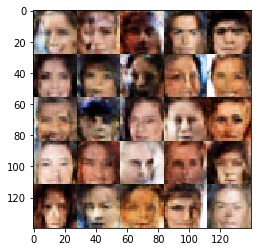

Epoch 1/1... Discriminator Loss: 1.2033... Generator Loss: 1.1026
Epoch 1/1... Discriminator Loss: 1.3008... Generator Loss: 0.9037
Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 0.8341
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 0.8761
Epoch 1/1... Discriminator Loss: 1.1596... Generator Loss: 1.3448
Epoch 1/1... Discriminator Loss: 1.1997... Generator Loss: 1.1754
Epoch 1/1... Discriminator Loss: 1.4376... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 1.4494... Generator Loss: 1.0902
Epoch 1/1... Discriminator Loss: 1.3265... Generator Loss: 0.7910
Epoch 1/1... Discriminator Loss: 1.2729... Generator Loss: 0.9128


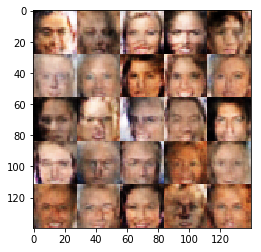

Epoch 1/1... Discriminator Loss: 1.3226... Generator Loss: 1.0488
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.7421
Epoch 1/1... Discriminator Loss: 1.0707... Generator Loss: 1.2890
Epoch 1/1... Discriminator Loss: 1.0072... Generator Loss: 1.3745
Epoch 1/1... Discriminator Loss: 1.2278... Generator Loss: 1.1399
Epoch 1/1... Discriminator Loss: 1.4416... Generator Loss: 0.6701
Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 0.8585
Epoch 1/1... Discriminator Loss: 1.3370... Generator Loss: 0.8953
Epoch 1/1... Discriminator Loss: 1.2462... Generator Loss: 1.1716
Epoch 1/1... Discriminator Loss: 1.3180... Generator Loss: 1.0831


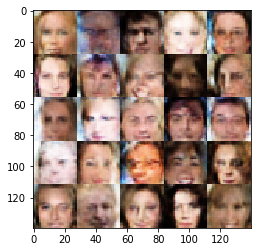

Epoch 1/1... Discriminator Loss: 1.1295... Generator Loss: 1.1498
Epoch 1/1... Discriminator Loss: 1.2696... Generator Loss: 1.0061
Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 0.9237
Epoch 1/1... Discriminator Loss: 1.2292... Generator Loss: 1.1088
Epoch 1/1... Discriminator Loss: 1.1323... Generator Loss: 1.1493
Epoch 1/1... Discriminator Loss: 1.3449... Generator Loss: 0.8818
Epoch 1/1... Discriminator Loss: 1.0656... Generator Loss: 1.0901
Epoch 1/1... Discriminator Loss: 1.2259... Generator Loss: 1.0181
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.9620


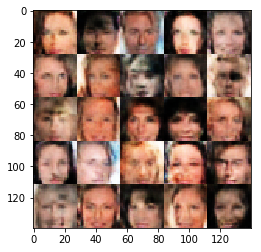

Epoch 1/1... Discriminator Loss: 1.2078... Generator Loss: 1.0994
Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 1.2797... Generator Loss: 0.8409
Epoch 1/1... Discriminator Loss: 1.0556... Generator Loss: 1.0667
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 1.1716
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 1.1846
Epoch 1/1... Discriminator Loss: 1.2344... Generator Loss: 0.9039
Epoch 1/1... Discriminator Loss: 1.1255... Generator Loss: 1.1563
Epoch 1/1... Discriminator Loss: 0.9577... Generator Loss: 1.1805
Epoch 1/1... Discriminator Loss: 1.2938... Generator Loss: 0.9091


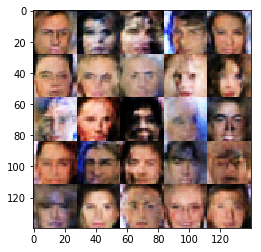

Epoch 1/1... Discriminator Loss: 1.2202... Generator Loss: 0.8942
Epoch 1/1... Discriminator Loss: 1.2983... Generator Loss: 0.9363
Epoch 1/1... Discriminator Loss: 1.1276... Generator Loss: 0.9570
Epoch 1/1... Discriminator Loss: 1.2648... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.2547... Generator Loss: 0.7039
Epoch 1/1... Discriminator Loss: 1.2025... Generator Loss: 1.0193
Epoch 1/1... Discriminator Loss: 1.4063... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.4905... Generator Loss: 0.8110
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 0.9199
Epoch 1/1... Discriminator Loss: 1.2092... Generator Loss: 1.1869


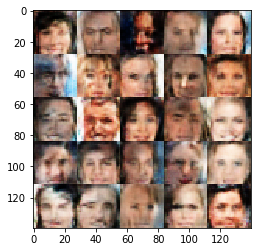

Epoch 1/1... Discriminator Loss: 1.3136... Generator Loss: 1.0015
Epoch 1/1... Discriminator Loss: 1.1770... Generator Loss: 0.9333
Epoch 1/1... Discriminator Loss: 1.1079... Generator Loss: 1.1617
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.8886
Epoch 1/1... Discriminator Loss: 1.2847... Generator Loss: 0.9777
Epoch 1/1... Discriminator Loss: 1.2531... Generator Loss: 0.9924
Epoch 1/1... Discriminator Loss: 0.9965... Generator Loss: 0.9818
Epoch 1/1... Discriminator Loss: 1.1853... Generator Loss: 1.0259
Epoch 1/1... Discriminator Loss: 1.1807... Generator Loss: 1.2826
Epoch 1/1... Discriminator Loss: 1.2352... Generator Loss: 0.8603


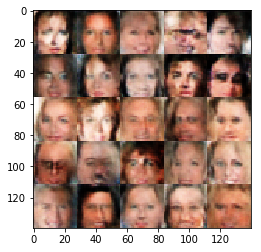

Epoch 1/1... Discriminator Loss: 1.2076... Generator Loss: 1.1618
Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.9725
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 1.2480
Epoch 1/1... Discriminator Loss: 1.2874... Generator Loss: 0.9444
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.9256
Epoch 1/1... Discriminator Loss: 1.0262... Generator Loss: 0.9539
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 1.2416
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.9009
Epoch 1/1... Discriminator Loss: 1.2669... Generator Loss: 0.8006
Epoch 1/1... Discriminator Loss: 1.1931... Generator Loss: 0.8375


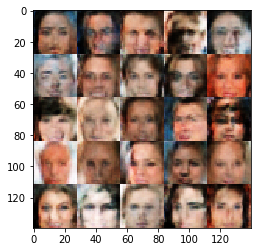

Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 1.0491
Epoch 1/1... Discriminator Loss: 1.2036... Generator Loss: 1.0035
Epoch 1/1... Discriminator Loss: 1.2728... Generator Loss: 0.9766
Epoch 1/1... Discriminator Loss: 1.2392... Generator Loss: 0.8533
Epoch 1/1... Discriminator Loss: 1.2078... Generator Loss: 1.0224
Epoch 1/1... Discriminator Loss: 1.0643... Generator Loss: 1.1248
Epoch 1/1... Discriminator Loss: 1.2294... Generator Loss: 1.0761
Epoch 1/1... Discriminator Loss: 1.2176... Generator Loss: 0.9217


KeyboardInterrupt: 

In [32]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.